In [2]:
import sys

package_path: str = '..'
if package_path not in sys.path:
    sys.path.append(package_path)

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
import os

import matplotlib.pyplot as plt
import numpy as np
from roi_rectangle import RoiRectangle

from src.config.config import load_config

In [9]:
config = load_config()
analysis_dir: str = config.path.analysis_dir
dark_file = os.path.join(analysis_dir, 'DARK', 'dark.npy')
darks = np.load(dark_file)
np.info(darks)

class:  ndarray
shape:  (2, 514, 1030)
strides:  (2117680, 4120, 4)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x7f603e2e6010
byteorder:  little
byteswap:  False
type: float32


Text(0.5, 1.0, 'Dark')

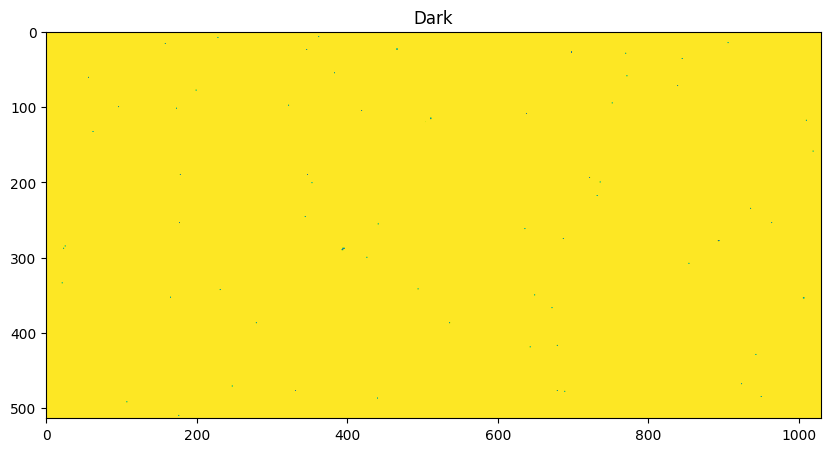

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(darks.sum(0))
ax.set_title('Dark')

Text(0.5, 1.0, 'Dark')

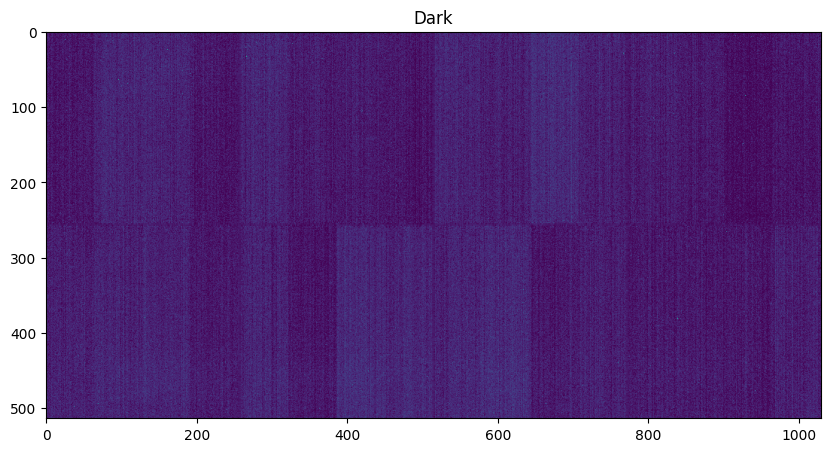

In [17]:
none_zero_darks = np.maximum(darks, -0.0)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(np.log1p(none_zero_darks.sum(0)))
ax.set_title('Dark')

In [27]:
_, height, width = darks.shape
print(height, width)
part_height = height // 2
part_width = width // 4
detacters = [[0] * 4 for _ in range(2)]

for i in range(2):
    for j in range(4):
        parts = darks[:, part_height * i: part_height * (i + 1), part_width * j: part_width * (j + 1)]
        print(parts.shape)
        detacters[i][j] = parts
print(detacters)



514 1030
(2, 257, 257)
(2, 257, 257)
(2, 257, 257)
(2, 257, 257)
(2, 257, 257)
(2, 257, 257)
(2, 257, 257)
(2, 257, 257)
[[array([[[-0.01560334,  0.00634651,  0.02340905, ...,  0.04749657,
          0.02882204,  0.02882204],
        [ 0.03777511,  0.05973029,  0.00774491, ...,  0.06572827,
          0.01085233,  0.01085233],
        [ 0.01519511,  0.1017132 ,  0.04671318, ...,  0.07731361,
          0.02606593,  0.02606593],
        ...,
        [-0.00199073,  0.08909202, -0.01903828, ...,  0.08875544,
          0.04595394,  0.04595394],
        [ 0.054382  ,  0.0538444 ,  0.03197745, ...,  0.01193471,
          0.0363053 ,  0.0363053 ],
        [ 0.054382  ,  0.0538444 ,  0.03197745, ...,  0.01193471,
          0.0363053 ,  0.0363053 ]],

       [[ 0.00433923,  0.0095814 ,  0.01446895, ...,  0.05121915,
          0.03433431,  0.03433431],
        [ 0.06129902,  0.06556614,  0.01505361, ...,  0.04653431,
          0.02271657,  0.02271657],
        [ 0.05141563,  0.069529  ,  0.03734341

/tmp/ipykernel_21199/843149411.py:6: RuntimeWarning: invalid value encountered in log1p
  axs[i, j].imshow(np.log1p(image))


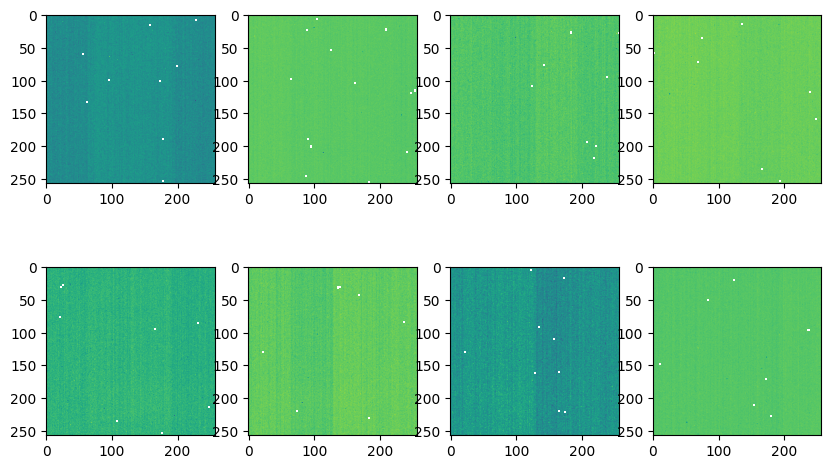

In [41]:
fig, axs = plt.subplots(2, 4, figsize=(10, 6))
for i in range(2):
    for j in range(4):
        image = detacters[i][j].sum(0)
        # image = np.maximum(image, -0.1)
        axs[i, j].imshow(np.log1p(image))

In [38]:


sums = [[0] * 4 for _ in range(2)]
sums2 = [[0] * 4 for _ in range(2)]
roi_sums = [[0] * 4 for _ in range(2)]
stds = [[0] * 4 for _ in range(2)]
for i in range(2):
    for j in range(4):
        image = detacters[i][j].sum(0)
        sums[i][j] = image.sum()
        sums2[i][j] = np.maximum(0, image).sum()
        stds[i][j] = np.std(image)
        roi = RoiRectangle(100, 50, 150, 200)
        roi_sums[i][j] = roi.slice(np.maximum(0, image)).sum()

print(sums)
print(sums2)
print(stds)
print(roi_sums)

[[-3593565.0, -5233865.5, -3191862.2, -3195264.2], [-3192773.2, -3992241.0, -3592341.5, -3194339.2]]
[[6594.1777, 6295.0103, 8195.83, 5033.727], [7307.8076, 7852.348, 7741.529, 5845.55]]
[[4668.944, 5504.406, 4401.956, 4262.1577], [4401.9556, 4921.461, 4668.944, 4401.9546]]
[[951.08887, 680.7242, 961.5915, 548.2718], [910.9498, 768.8087, 917.5379, 609.98413]]


In [ ]:
import h5py
import hdf5plugin

with h5py.File(file, "r") as hf:
    if "detector" not in hf:
        raise KeyError(f"Key 'detector' not found in {file}")

    return np.maximum(
        0,
        np.asarray(
            hf[f'detector/{config.param.hutch.value}/{config.param.detector.value}/image/block0_values']
        )
    )